In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("toxicity-detection/train.csv")

### Correlation among labels
Toxic, Obscene and Insult are highly correlated with eachother

In [3]:
def correlation_heatmap(df, title):
    plt.figure('heatmap', figsize=[10,10])
    plt.title(title)
    df_corr = df.corr()
    sns.heatmap(df_corr, vmax=0.6, square=True, annot=True, cmap='YlOrRd')
    plt.yticks(rotation = 45)
    plt.xticks(rotation = 45)
    plt.show()

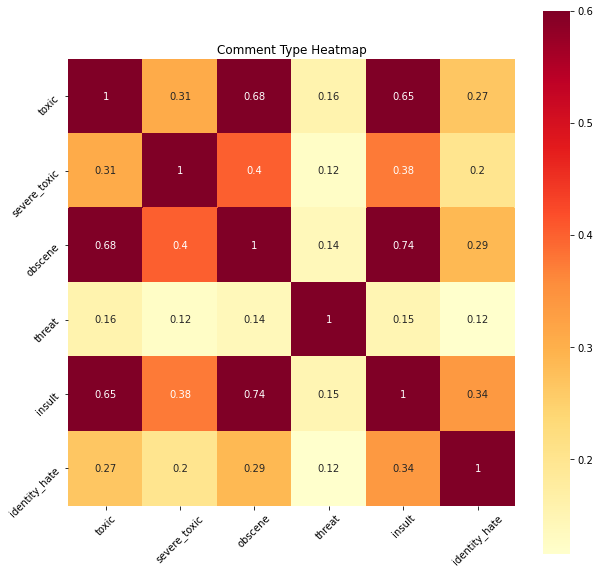

In [4]:
correlation_heatmap(df, 'Comment Type Heatmap')

### Average Comment Length 
To fix the maximum sequence length in LSTM which is needed for padding tokens

In [5]:
comment = df['comment_text']
print(comment.head())

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object


average length of comment: 394.073


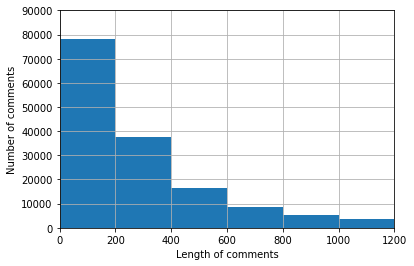

In [6]:
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

In [7]:
label = df[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]

<IPython.core.display.Javascript object>

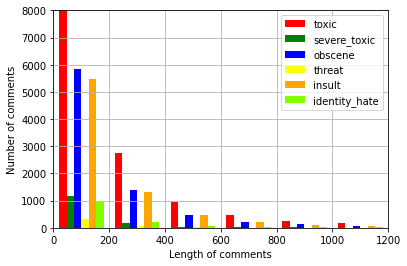

In [8]:
y = np.zeros(label.shape)
for ix in range(comment.shape[0]):
    l = len(comment[ix])
    if label.loc[ix][0] :
        y[ix][0] = l
    if label.loc[ix][1] :
        y[ix][1] = l
    if label.loc[ix][2] :
        y[ix][2] = l
    if label.loc[ix][3] :
        y[ix][3] = l
    if label.loc[ix][4] :
        y[ix][4] = l
    if label.loc[ix][5] :
        y[ix][5] = l

labelsplt = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
color = ['red','green','blue','yellow','orange','chartreuse']        
plt.hist(y,bins = bins,label = labelsplt,color = color)
plt.axis([0, 1200, 0, 8000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

### Word Clouds
Visualize most commonly appearing words in each category based on frequency of occurence

In [9]:
from PIL import Image
def display_cloud(label):
    plt.subplots(figsize=(10,10))
    text = df[df[label]==1]["comment_text"].tolist()
    wc = WordCloud(stopwords=STOPWORDS,
                   background_color='black',
                   max_words=50,
                   collocations=False,
                   width=1800,
                   height=800)
    wc.generate(' '.join(text))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.title(label,fontsize=36)
    plt.show()

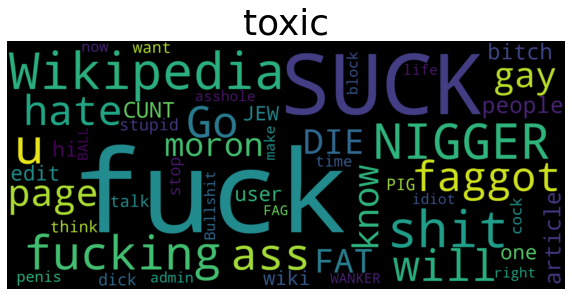

In [10]:
display_cloud("toxic")

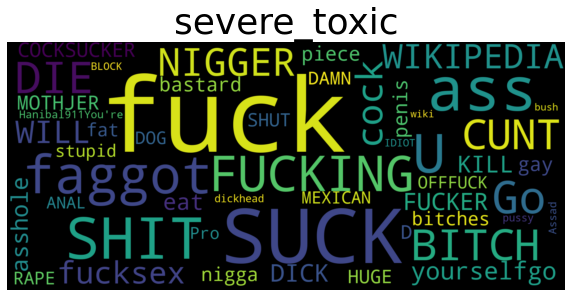

In [11]:
display_cloud("severe_toxic")

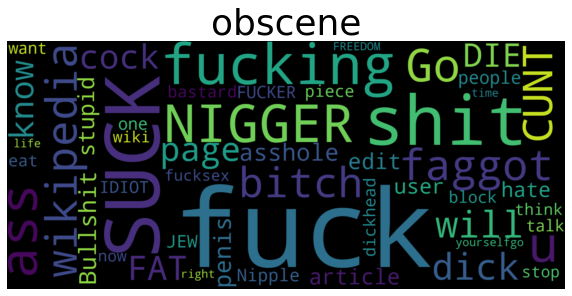

In [12]:
display_cloud("obscene")

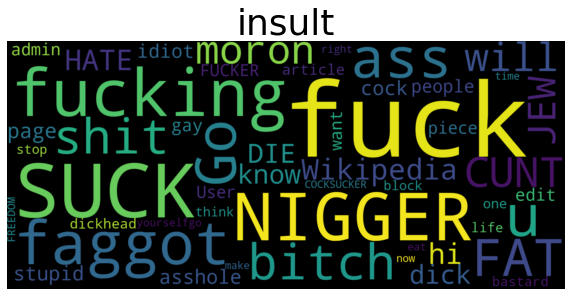

In [13]:
display_cloud("insult")

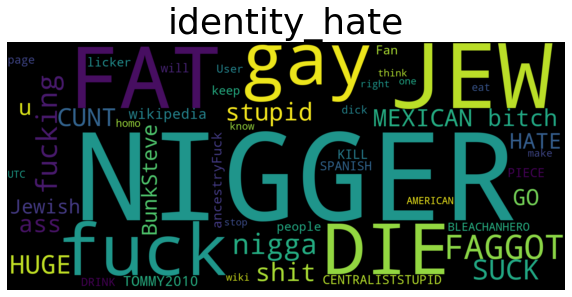

In [14]:
display_cloud("identity_hate")

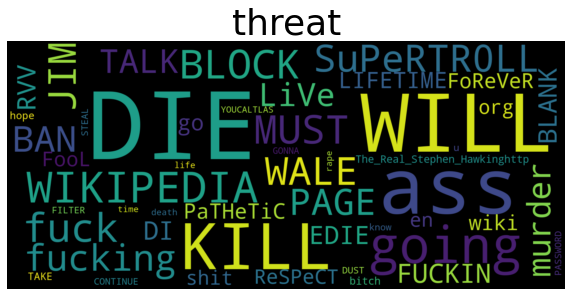

In [15]:
display_cloud("threat")

### Bi-gram and Tri-gram analysis
To find out co-occurences of words, gives a overview on data cleaning steps to be undertaken

In [16]:
def gram_analysis(data,gram):
    stop_words_set = set(stopwords.words('english'))
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stop_words_set]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens

def gram_freq(df, gram, categ_col, text_col):
    category_text = " ".join(df[df[categ_col]==1][text_col].sample(200).values)
    toks = gram_analysis(category_text, gram)
    tok_freq = pd.DataFrame(data=[toks, np.ones(len(toks))]).T.groupby(0).sum().reset_index()
    tok_freq.columns = ['token','frequency']
    tok_freq = tok_freq.sort_values(by='frequency',ascending=False)
    
    plt.figure(figsize=(15,8))
    plt.title("{} most common tokens".format(categ_col))
    sns.barplot(x='token', y='frequency', data=tok_freq.iloc[:30])
    plt.xticks(rotation=90)
    plt.show()
    
    return 

<IPython.core.display.Javascript object>

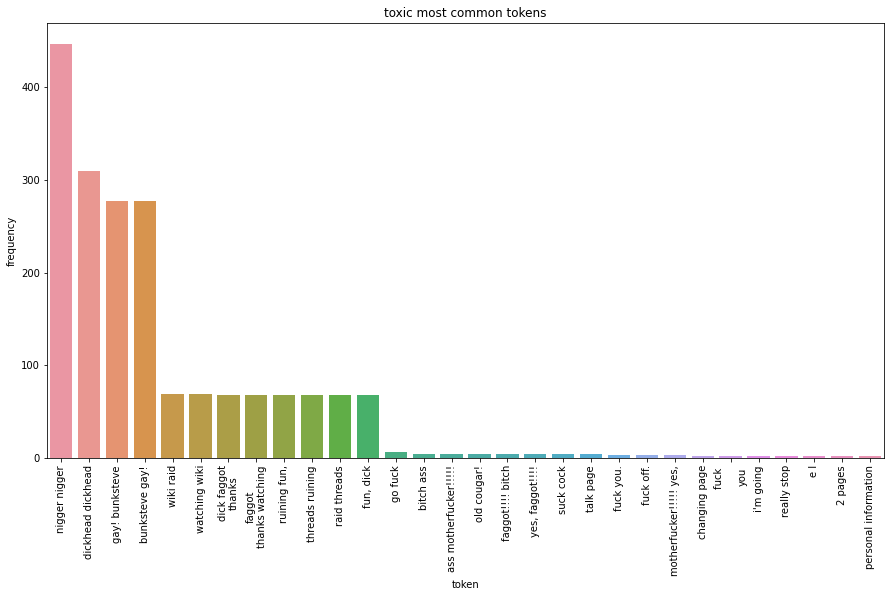

<IPython.core.display.Javascript object>

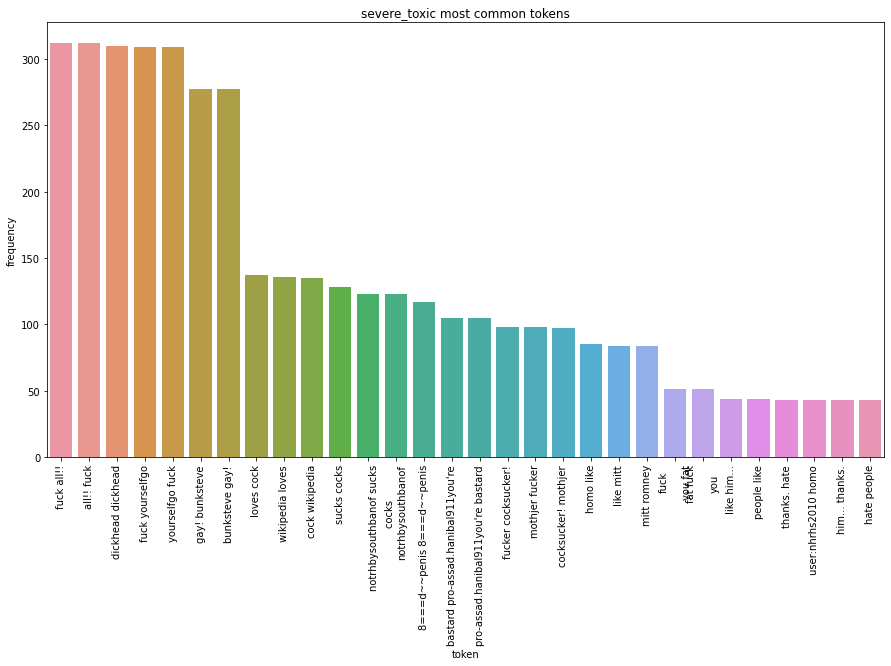

<IPython.core.display.Javascript object>

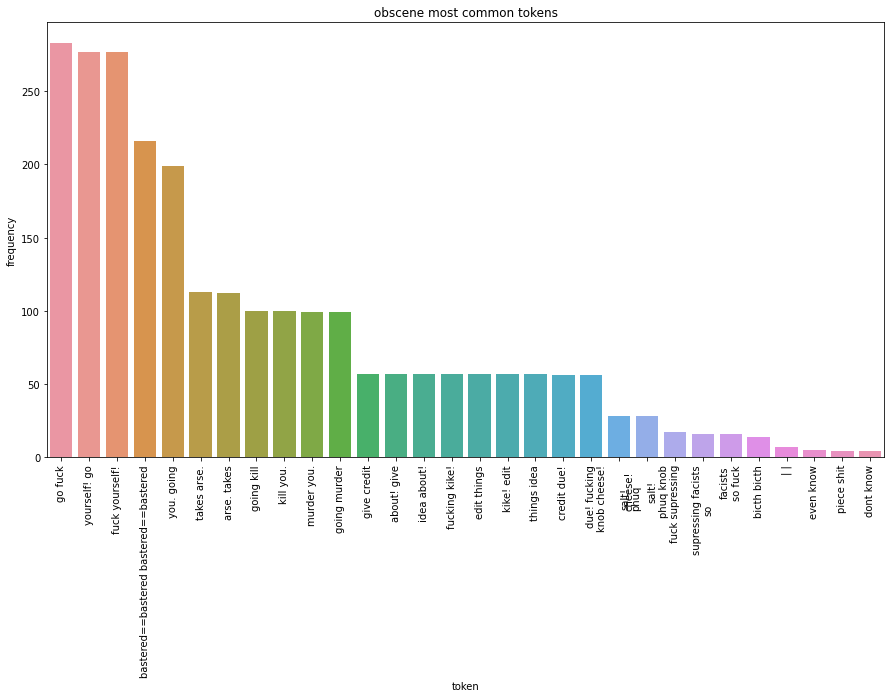

<IPython.core.display.Javascript object>

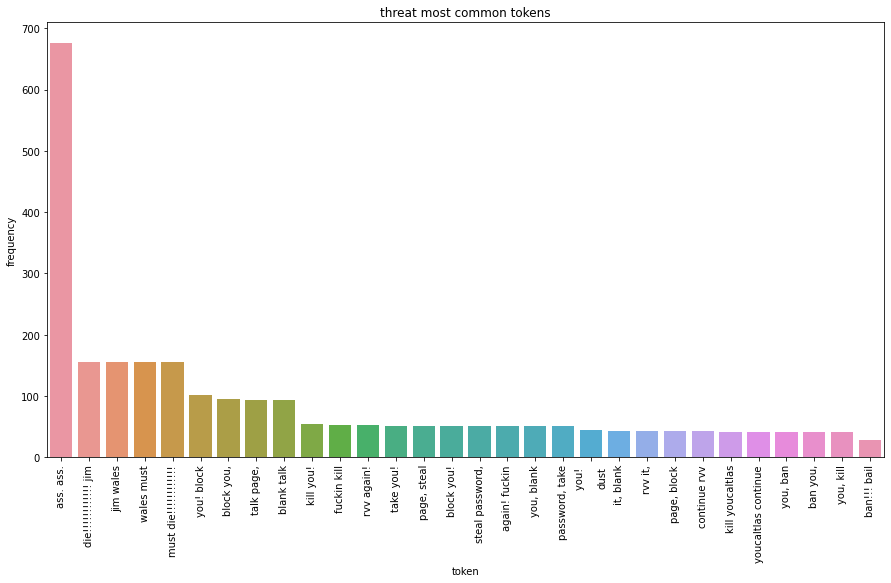

<IPython.core.display.Javascript object>

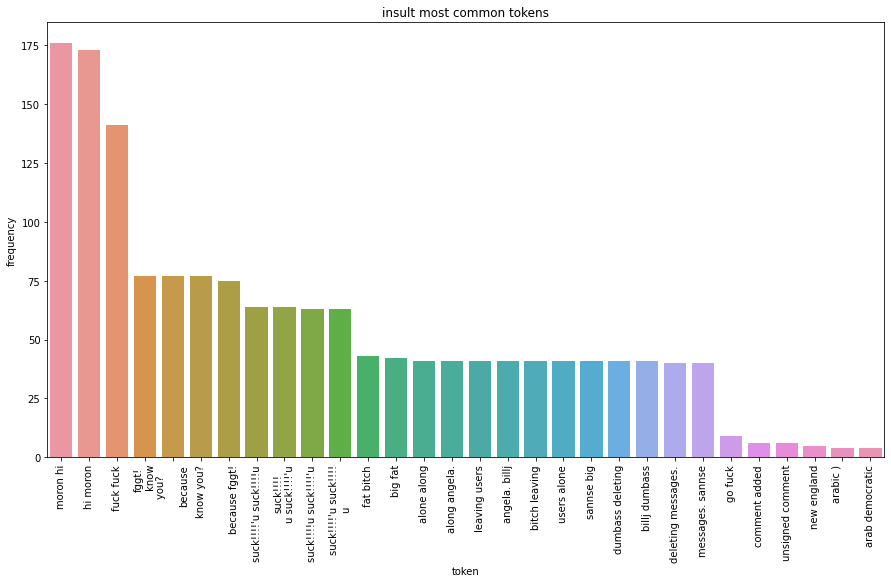

<IPython.core.display.Javascript object>

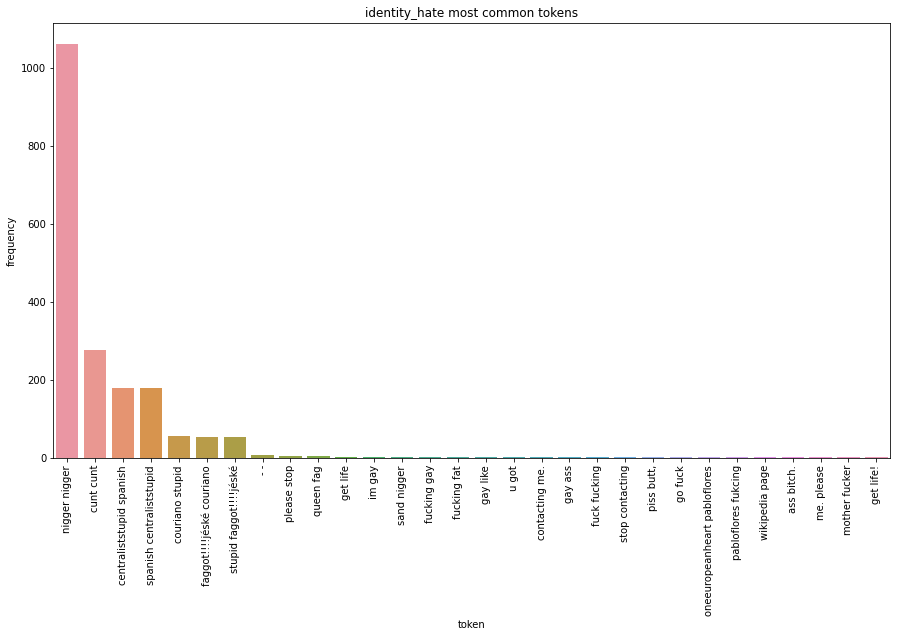

In [17]:
for i in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    gram_freq(df,2, i, 'comment_text')

<IPython.core.display.Javascript object>

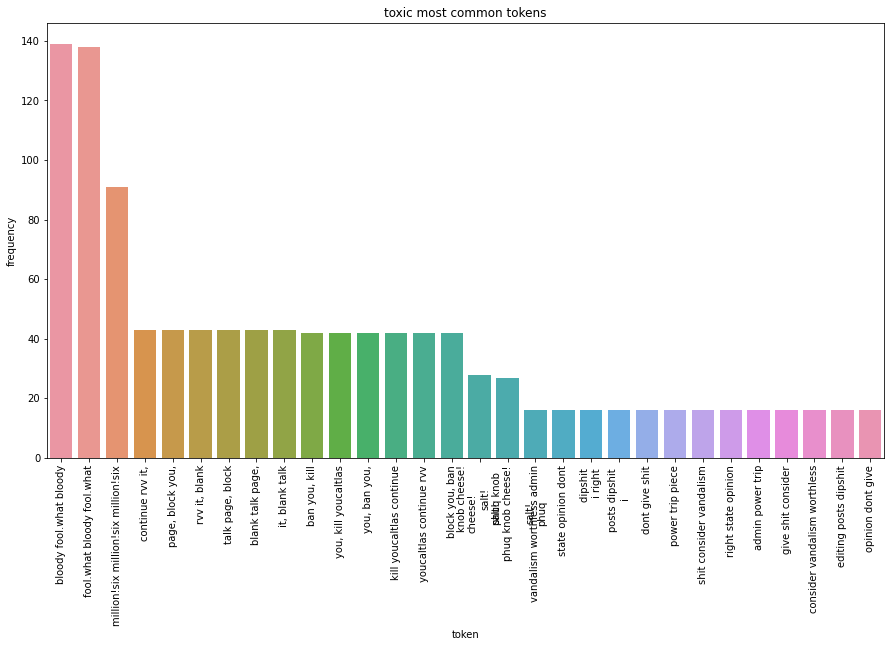

<IPython.core.display.Javascript object>

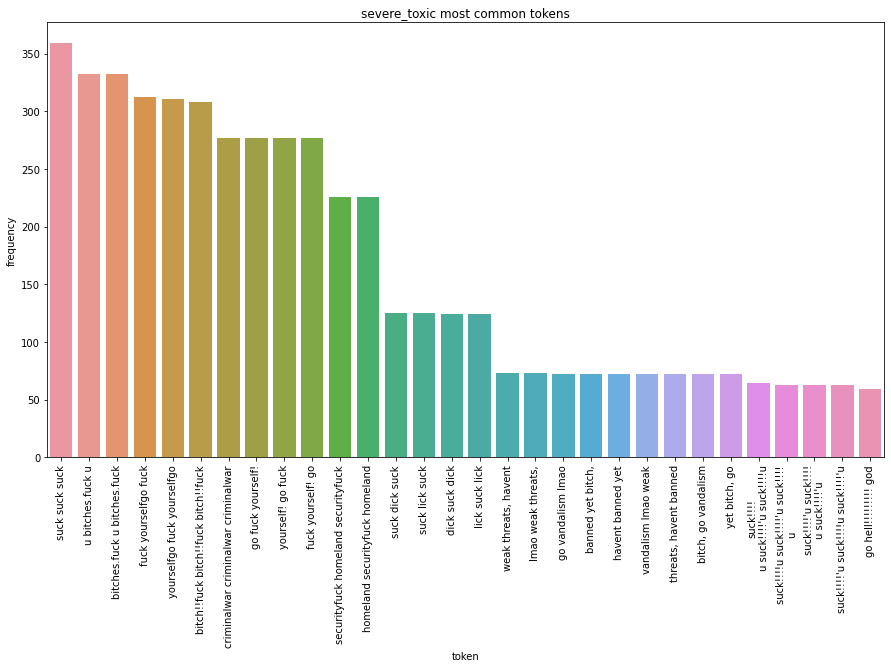

<IPython.core.display.Javascript object>

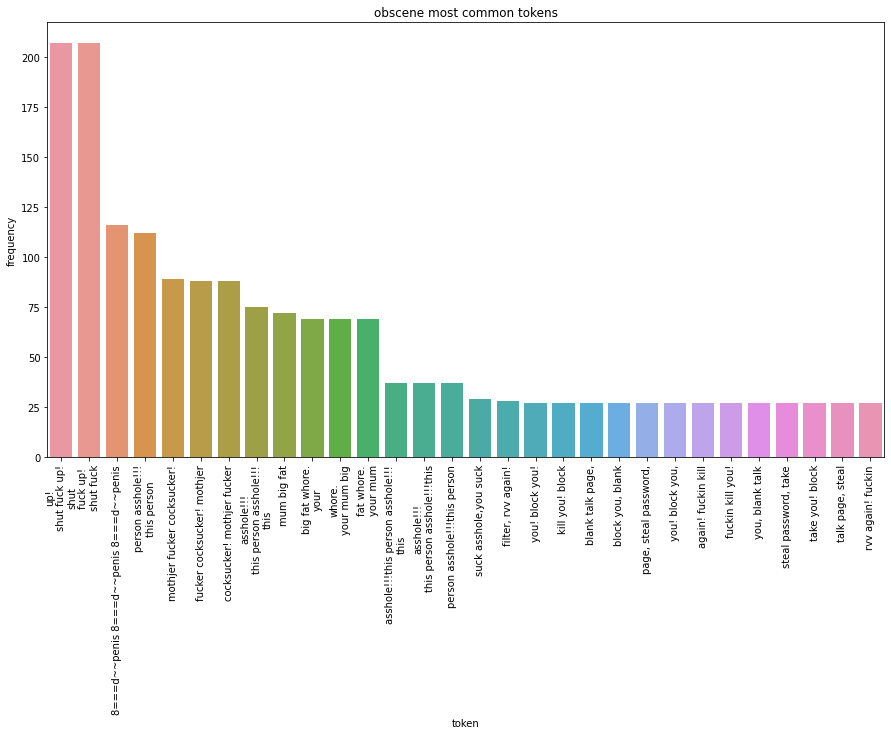

<IPython.core.display.Javascript object>

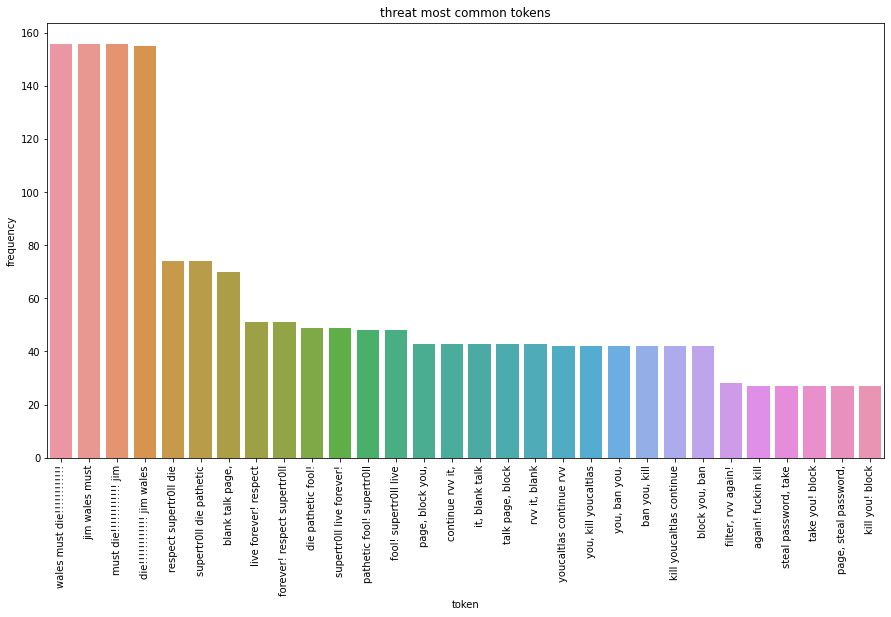

<IPython.core.display.Javascript object>

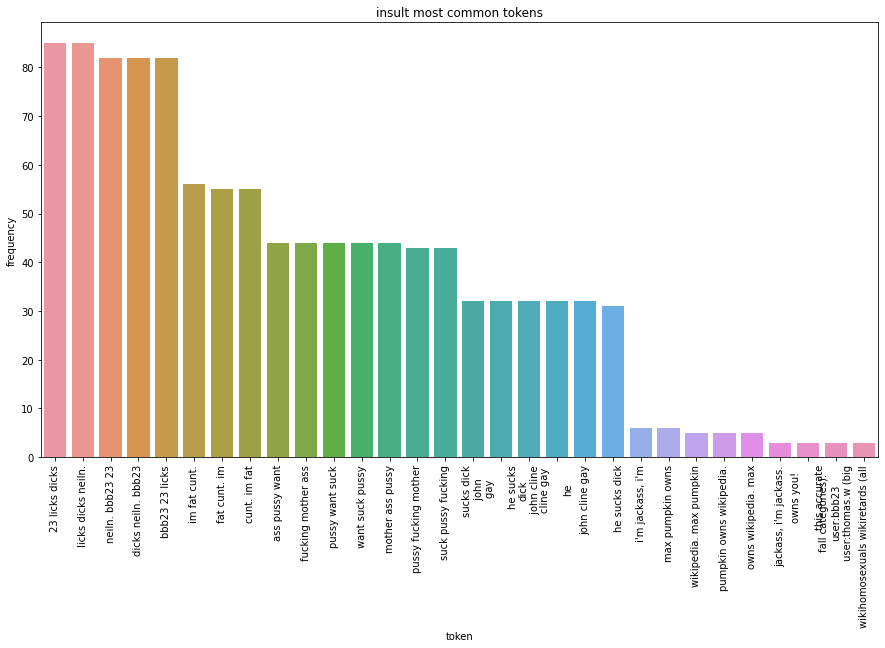

<IPython.core.display.Javascript object>

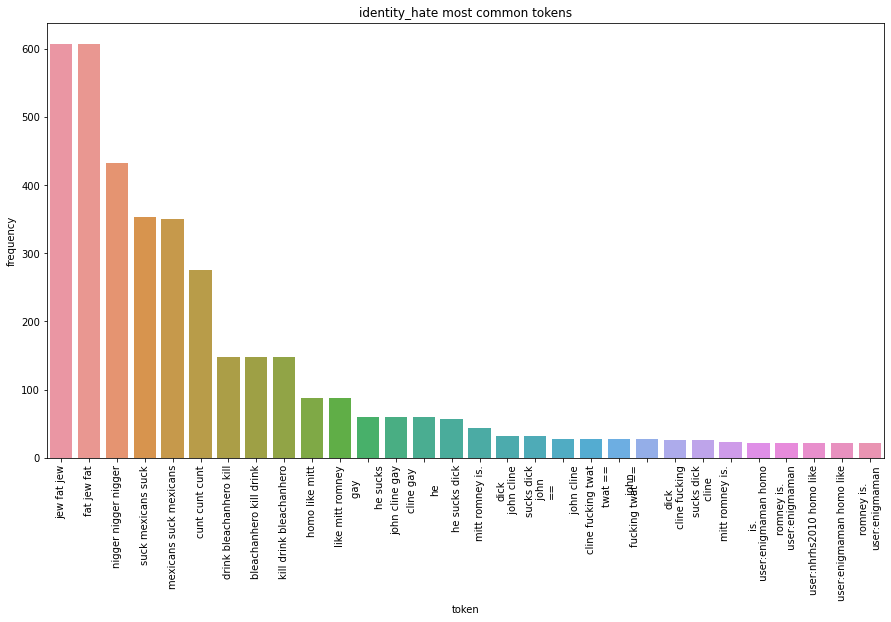

In [18]:
for i in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    gram_freq(df,3, i, 'comment_text')